# Background

Ordinary linear regression assumes that the response variable is normally distributed. The normal distribution, also known as the Gaussian distribution or bell curve. In some problems the response variable is not normally distributed. For instance,
a coin toss can result in two outcomes: heads or tails. The Bernoulli distribution describes the probability distribution of a random variable that can take the positive case with probability P or the negative case with probability 1-P.

# Logistic function

$F(t) = \frac{1}{1+e^{-t}}$ , logistic function always returns a value between zero and one.

# Logistic regression

t is equal to a linear combination of explanatory variables, as follows:

$F(t) = \frac{1}{1+e^{-{\beta_0 + \beta_1*x}}}$

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./data/SMSSpamCollection', delimiter='\t', header=None)

In [5]:
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print 'Percentage of Spam: {0}'.format(df[df[0] == 'spam'].count() / df.count())

Percentage of Spam: 0    0.134063
1    0.134063
dtype: float64


In [7]:
print 'Percentage of ham: {0}'.format(df[df[0] == 'ham'].count() / df.count())

Percentage of ham: 0    0.865937
1    0.865937
dtype: float64


In [8]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

In [10]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
preditions = model.predict(X_test)

In [13]:
list(preditions[:4]), list(y_test[:4])

(['ham', 'ham', 'ham', 'ham'], ['ham', 'ham', 'ham', 'ham'])

In [14]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print np.mean(scores), scores


0.955489189 [ 0.95818399  0.96052632  0.95574163  0.95209581  0.9508982 ]


# Binary classi cation performance metrics

The most common metrics are accuracy, precision, recall, F1 measure, and ROC AUC score.
All of these measures depend on the concepts of true positives, true negatives, false positives, and false negatives. Positive and negative refer to the classes. True and false denote whether the predicted class is the same as the true class.


A confusion matrix, or contingency table, can be used to visualize true and false positives and negatives. The rows of the matrix are the true classes of the instances, and the columns are the predicted classes of the instances:


In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [16]:
confusion_matrix = confusion_matrix(y_test, preditions)

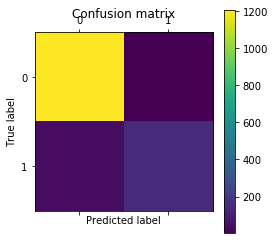

In [17]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
print confusion_matrix

[[1205    2]
 [  40  146]]


# Accuracy

 While accuracy measures the overall correctness of the classi er, it
does not distinguish between false positive errors and false negative errors. Some applications may be more sensitive to false negatives than false positives, or vice versa. 

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, preditions)

0.96984924623115576

# Precision and recall

Precision is the fraction of positive predictions that are correct:
$$P = \frac{TP}{TP+FP}$$

Recall is the fraction of the truly positive instances that the classier recognizes:
$$R = \frac{TP}{TP+FN}$$

Individually, precision and recall are seldom informative; they are both incomplete
views of a classi er's performance. 

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(["spam", "ham"])
yc_train = encoder.transform(y_train)
yc_test = encoder.transform(y_test)

In [24]:
classifier = LogisticRegression()
#classifier.fit(X_train, y_train)
precisions = cross_val_score(classifier, X_train, yc_train, cv=5, scoring='precision')
print 'Precision', np.mean(precisions), precisions

Precision 0.986930577678 [ 1.          0.98765432  0.98701299  0.97368421  0.98630137]


In [25]:
recalls = cross_val_score(classifier, X_train, yc_train, cv=5, scoring='recall')
print 'Recalls', np.mean(recalls), recalls

Recalls 0.677338811631 [ 0.69026549  0.71428571  0.67857143  0.66071429  0.64285714]


# Calculating the F1 measure
The F1 measure is the harmonic mean, or weighted average, of the precision and recall scores. Also called the f-measure or the f-score, the F1 score is calculated using the following formula:
$$F1=2\frac{P*R}{P+R}$$
A model with perfect precision and recall scores will achieve an F1 score of one;A model with a perfect precision score and a recall score of zero will achieve an F1 score of zero

In [26]:
f1s = cross_val_score(classifier, X_train, yc_train, cv=5, scoring='f1')
print 'F1', np.mean(f1s), f1s

F1 0.803122939181 [ 0.81675393  0.82901554  0.8042328   0.78723404  0.77837838]


# ROC

A Receiver Operating Characteristic(ROC curve) visualizes a classifier's performance. Unlike accuracy, the ROC curve is insensitive to data sets with unbalanced class proportions; unlike precision and recall, the ROC curve illustrates the classifier's performance for all values of the discrimination threshold. ROC curves plot the classifier's recall against its fall-out. Fall-out, or the false positive rate, is the number of false positives divided by the total number of negatives. It is calculated using the following formula:
   $$F = \frac{FP}{TN+FP}$$
# AUC

AUC is the area under the ROC curve; it reduces the ROC curve to a single value, which represents the expected performance of the classi er. 

In [27]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [30]:
classifier = LogisticRegression()
classifier.fit(X_train, yc_train)
predictions = classifier.predict_proba(X_test)

In [42]:
false_positive_rate, recall, thresholds = roc_curve(yc_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)

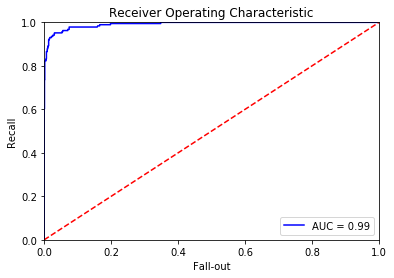

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [43]:
roc_auc

0.99165263561126404